In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [229]:
df=pd.read_csv(r"DataSets/fertilizer_recommend.csv")

In [230]:
df.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea


In [231]:
df.columns

Index(['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer'],
      dtype='object')

Checking for the datatypes and missing values

In [232]:
# To find the number of rows and columns
print(df.shape)

# check for the data types, memory usage, etc
display(df.info())

(552, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   Phosphorous  552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB


None

In [233]:
# checking the no. of missing values in the dataset
df.isnull().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

Checking for the basic statistics of the variables

In [234]:
# statistics of the numerical variables
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Temparature,552.0,28.630435,5.088082,0.0,26.0,29.0,32.0,38.0
Humidity,552.0,64.557971,11.880236,50.0,54.0,62.0,68.0,95.0
Moisture,552.0,42.840580,11.507275,25.0,33.0,41.0,51.0,65.0
Nitrogen,552.0,28.521739,29.121989,0.0,10.0,15.0,37.0,126.0
Potassium,552.0,10.144928,13.456956,0.0,0.0,0.0,18.0,59.0
Phosphorous,552.0,21.115942,14.920514,0.0,8.0,20.0,36.0,54.0


In [235]:
# statistics of the category variables
display(df.describe(include='object'))

,Soil_Type,Crop_Type,Fertilizer
count,552,552,552
unique,5,17,14
top,Loamy,Cotton,Urea
freq,192,64,108


Data Visualisation

In [236]:
# print the unique class of the Fertilizer 
print("There are seven class in Fertilizer: ", df['Fertilizer'].unique())

There are seven class in Fertilizer:  ['Urea' 'TSP' 'Superphosphate' 'Potassium sulfate.' 'Potassium chloride'
 'DAP' '28-28' '20-20' '17-17-17' '15-15-15' '14-35-14' '14-14-14'
 '10-26-26' '10-10-10']


C:\Users\Lkumar\AppData\Local\Temp\ipykernel_74592\2461949699.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Fertilizer',data=df,palette="plasma_r")


<Axes: xlabel='count', ylabel='Fertilizer'>

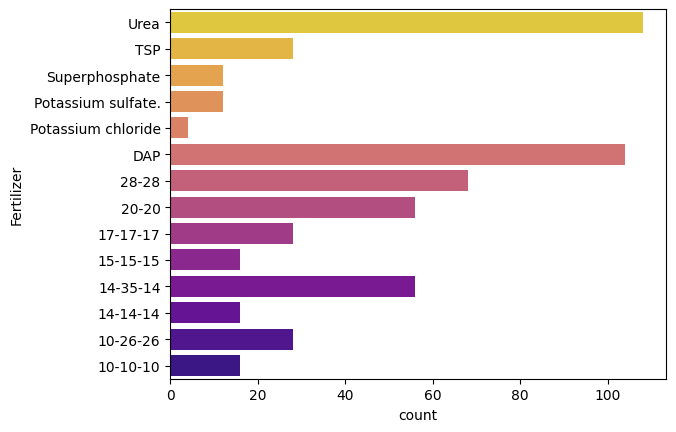

In [237]:
#Visualization of the class in Fertilizer category with countplot
sns.countplot(y='Fertilizer',data=df,palette="plasma_r")

In [238]:
# Columns in the dataset
numeric_features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
categorical_features = ['Soil_Type', 'Crop_Type', 'Fertilizer']

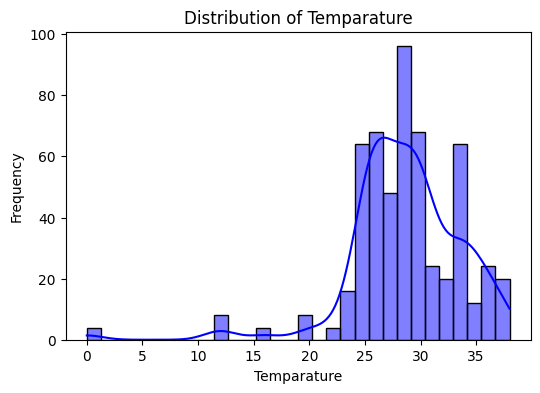

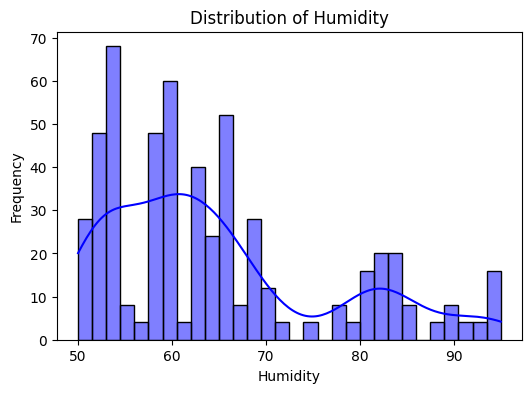

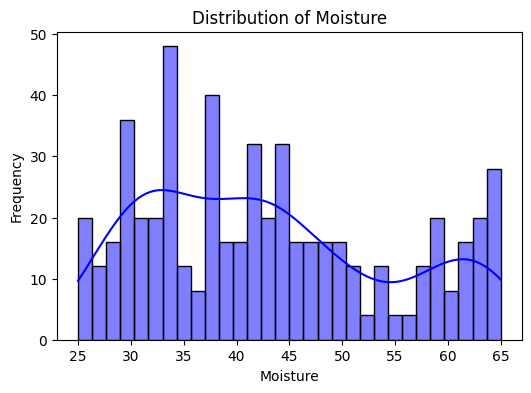

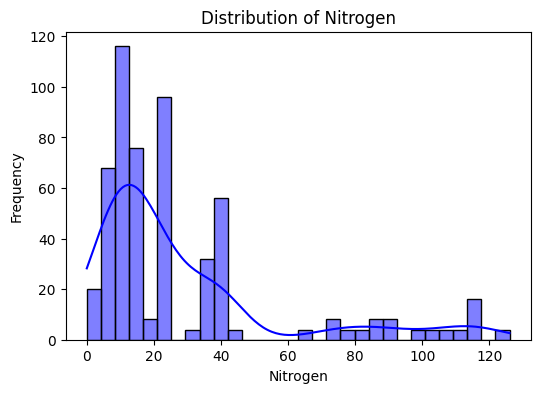

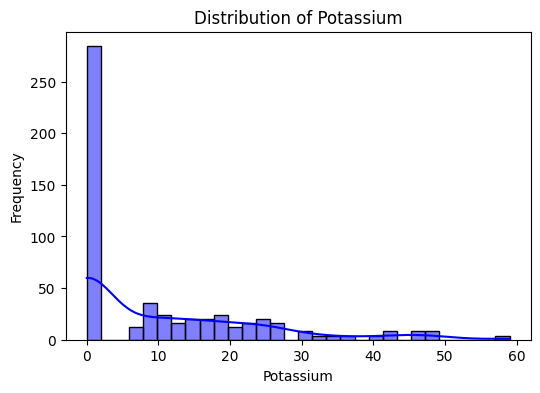

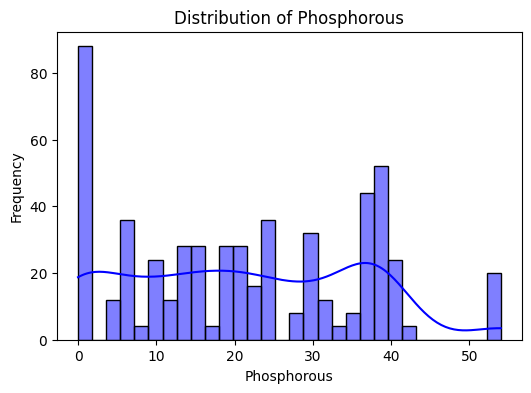

In [239]:
#Histogram for numeric features
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\Lkumar\AppData\Local\Temp\ipykernel_74592\760485739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


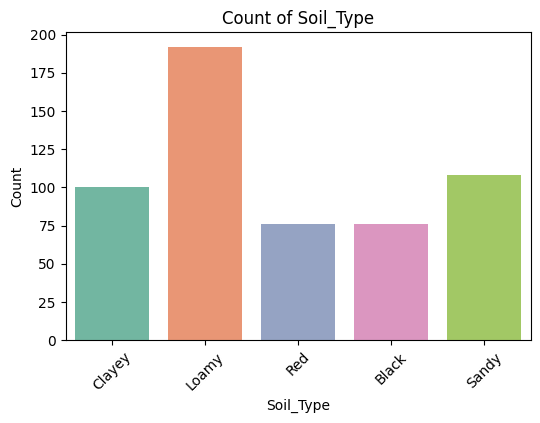

C:\Users\Lkumar\AppData\Local\Temp\ipykernel_74592\760485739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


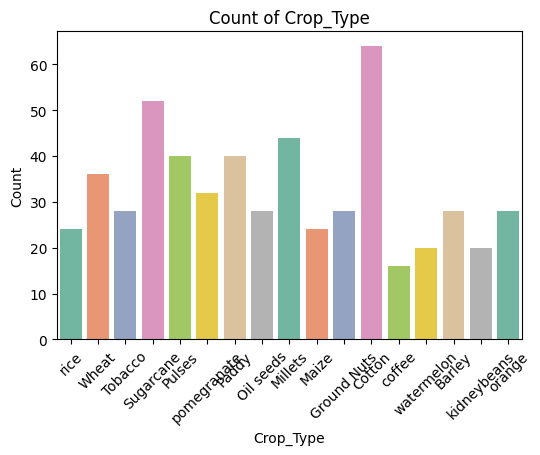

C:\Users\Lkumar\AppData\Local\Temp\ipykernel_74592\760485739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


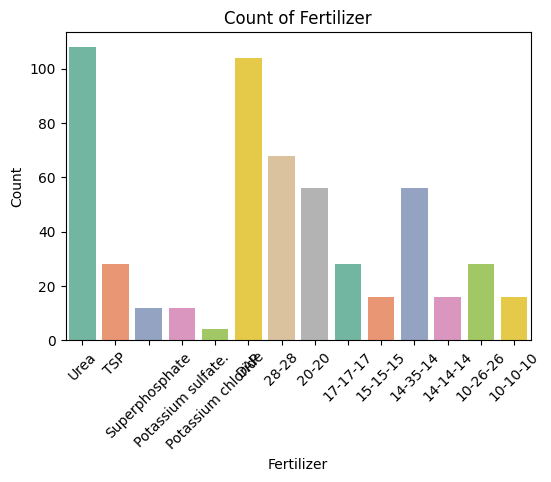

In [240]:
#Bar plot for categorical features
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=df, palette='Set2')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

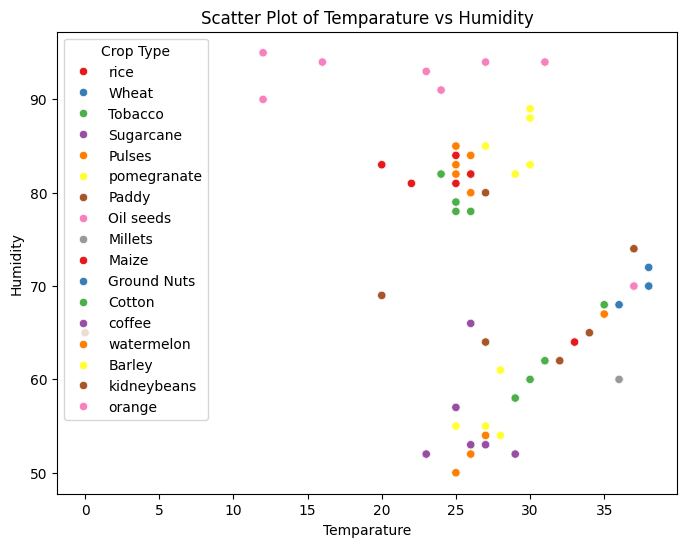

In [241]:
#Scatter plots for relationships between numeric features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temparature', y='Humidity', data=df, hue='Crop_Type', palette='Set1')
plt.title('Scatter Plot of Temparature vs Humidity')
plt.xlabel('Temparature')
plt.ylabel('Humidity')
plt.legend(title='Crop Type')
plt.show()

C:\Users\Lkumar\AppData\Local\Temp\ipykernel_74592\1506000851.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Soil_Type', y='Moisture', data=df, palette='Set3')


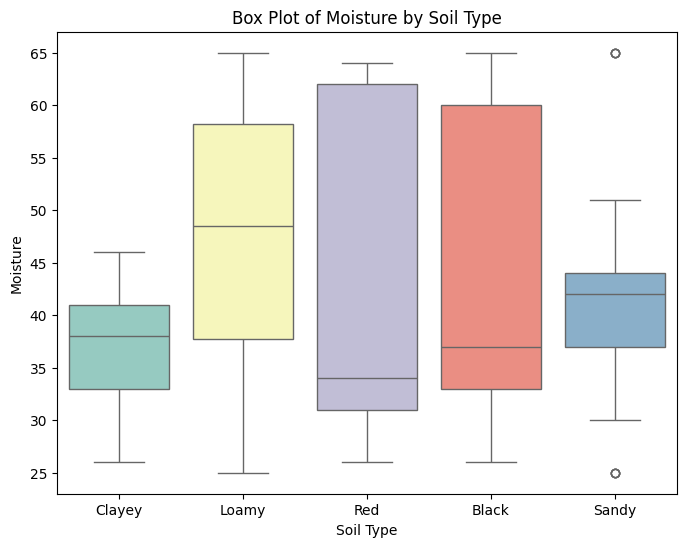

In [242]:
#Box plot for detecting outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Soil_Type', y='Moisture', data=df, palette='Set3')
plt.title('Box Plot of Moisture by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Moisture')
plt.show()

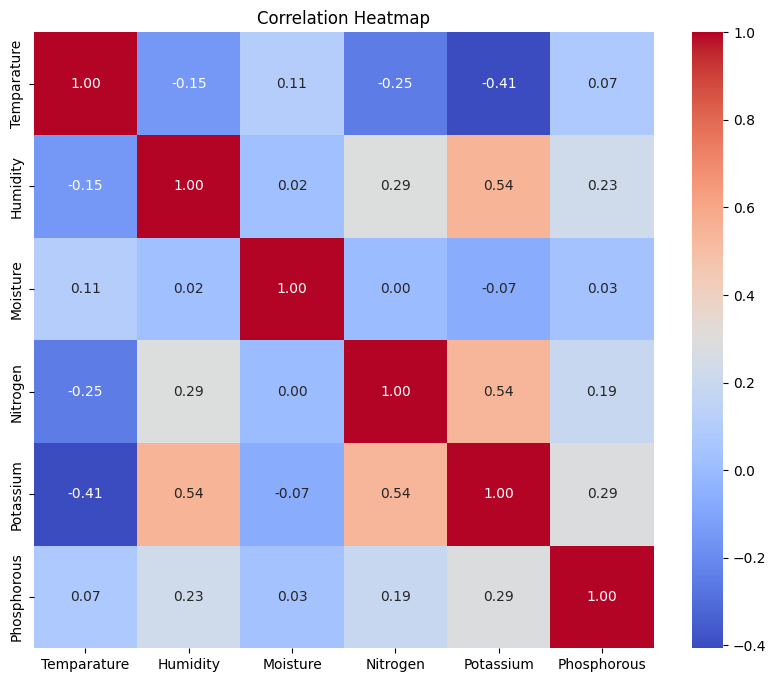

In [243]:
#Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

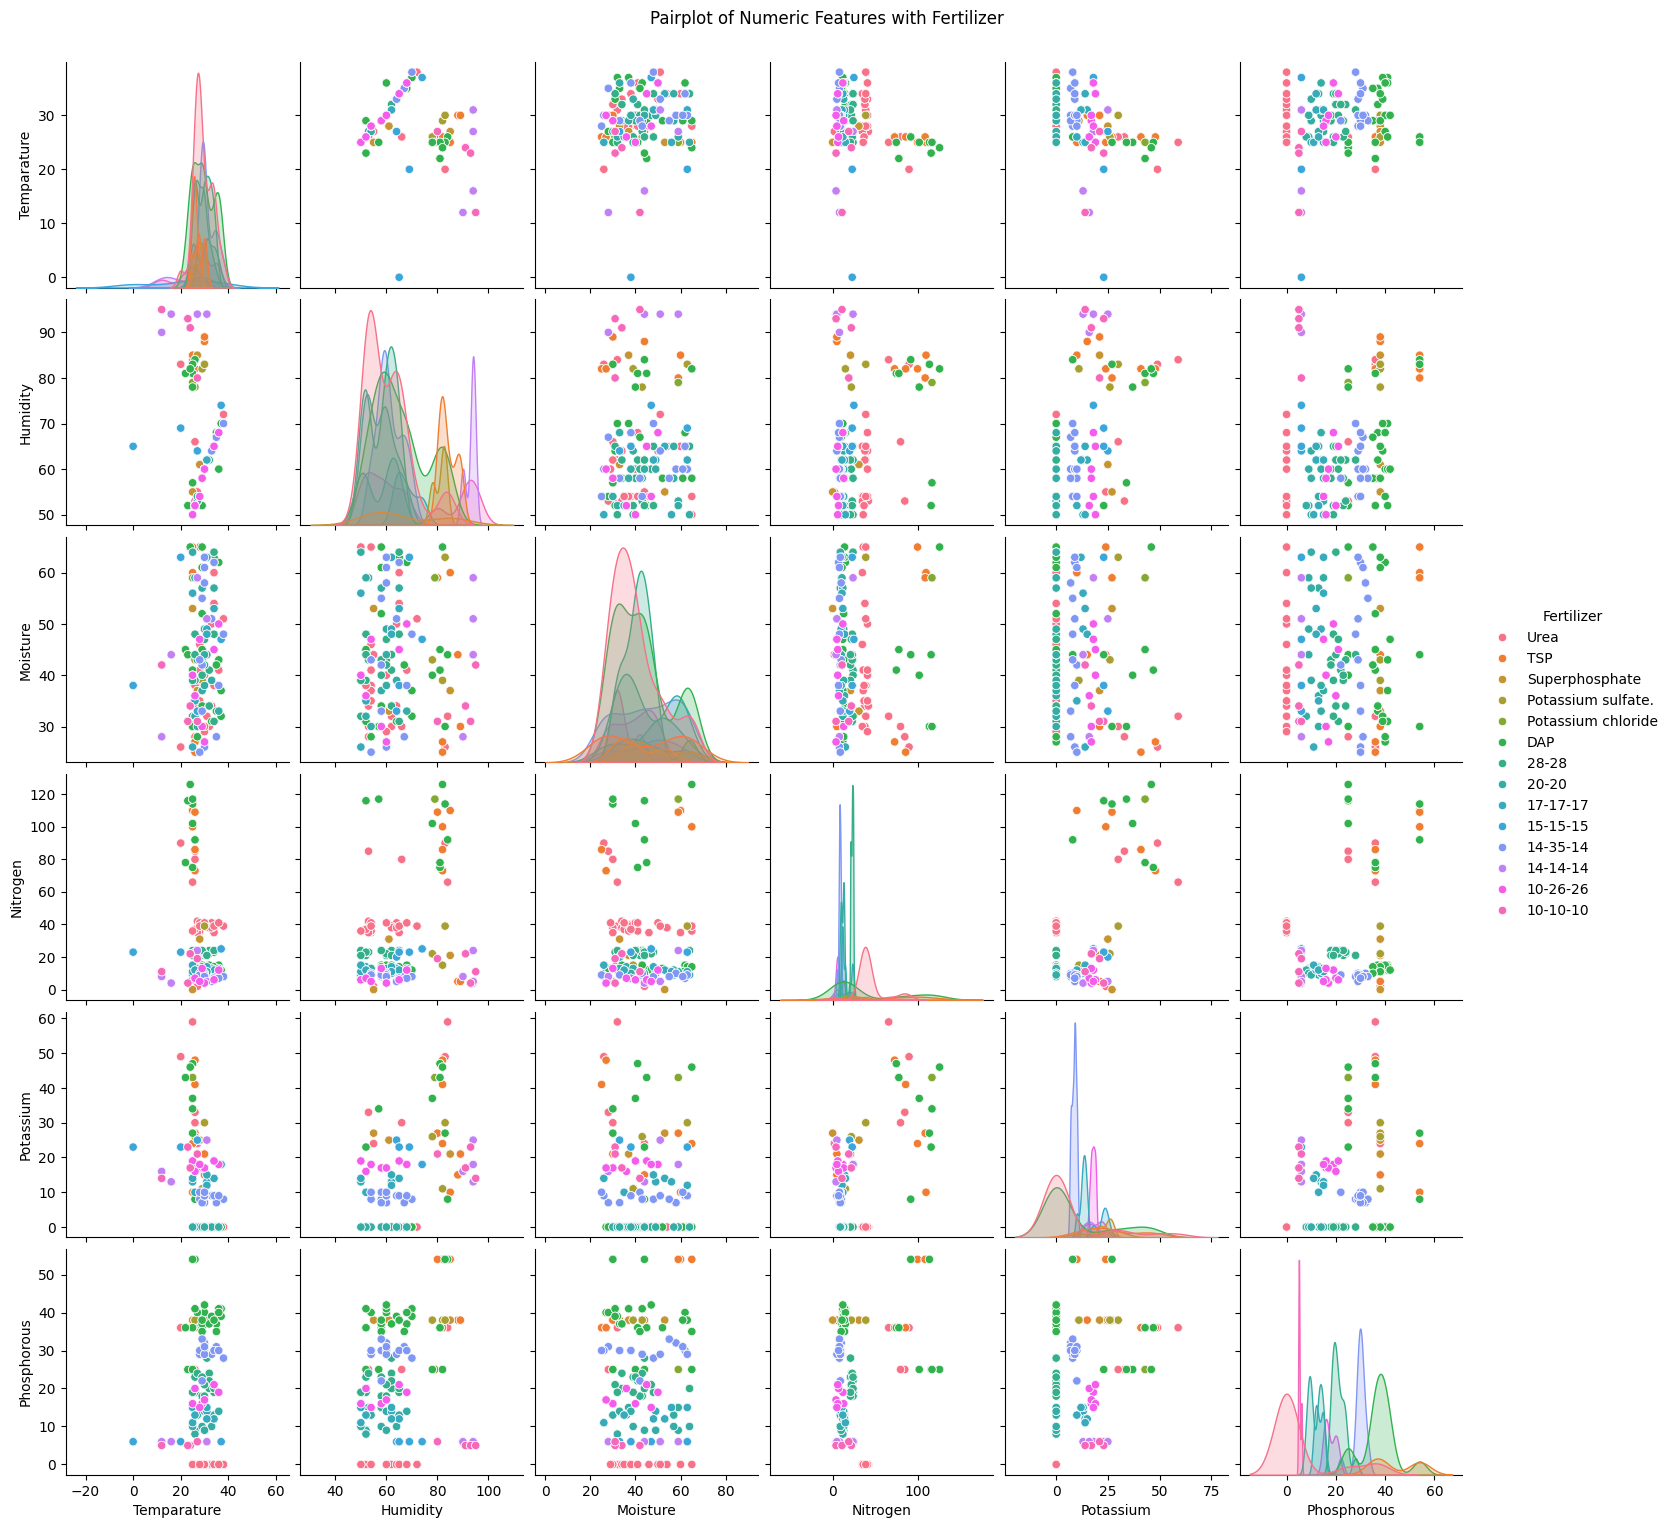

In [244]:
#Pairplot for all numeric features**
sns.pairplot(df[numeric_features + ['Fertilizer']], hue='Fertilizer', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features with Fertilizer', y=1.02)
plt.show()

Data Preprocessing

In [245]:
#Data Processing
new_data=df

In [246]:
#replacing null values with NaN
new_data[['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous','Soil_Type', 'Crop_Type']] = df[['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous','Soil_Type', 'Crop_Type']].replace(0, np.nan)

In [247]:
#Count of NaN
new_data.isnull().sum()

Temparature      4
Humidity         0
Moisture         0
Soil_Type        0
Crop_Type        0
Nitrogen         4
Potassium      284
Phosphorous     88
Fertilizer       0
dtype: int64

In [248]:
#Replacing NaN values with the mean values
new_data['Temparature'].fillna(df['Temparature'].mean(),inplace=True)
new_data['Nitrogen'].fillna(df['Nitrogen'].mean(),inplace=True)
new_data['Potassium'].fillna(df['Potassium'].mean(),inplace=True)
new_data['Phosphorous'].fillna(df['Phosphorous'].mean(),inplace=True)

C:\Users\Lkumar\AppData\Local\Temp\ipykernel_74592\3372380283.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['Temparature'].fillna(df['Temparature'].mean(),inplace=True)
C:\Users\Lkumar\AppData\Local\Temp\ipykernel_74592\3372380283.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [249]:
new_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temparature,552.0,28.839416,4.460325,12.0,26.0,29.000000,32.000000,38.0
Humidity,552.0,64.557971,11.880236,50.0,54.0,62.000000,68.000000,95.0
Moisture,552.0,42.840580,11.507275,25.0,33.0,41.000000,51.000000,65.0
Nitrogen,552.0,28.729927,29.019676,2.0,11.0,17.000000,37.000000,126.0
Potassium,552.0,20.895522,8.475124,7.0,18.0,20.895522,20.895522,59.0
Phosphorous,552.0,25.120690,11.743264,5.0,16.0,25.120690,36.000000,54.0


In [250]:
# List of categorical columns
categorical_features = ['Soil_Type', 'Crop_Type', 'Fertilizer']

# Get unique values for each categorical column
unique_values = {feature: df[feature].unique() for feature in categorical_features}

# Display unique values for each feature
print("Unique values for each categorical column:")
for feature, values in unique_values.items():
    print(f"{feature}: {values}")

Unique values for each categorical column:
Soil_Type: ['Clayey' 'Loamy' 'Red' 'Black' 'Sandy']
Crop_Type: ['rice' 'Wheat' 'Tobacco' 'Sugarcane' 'Pulses' 'pomegranate' 'Paddy'
 'Oil seeds' 'Millets' 'Maize' 'Ground Nuts' 'Cotton' 'coffee'
 'watermelon' 'Barley' 'kidneybeans' 'orange']
Fertilizer: ['Urea' 'TSP' 'Superphosphate' 'Potassium sulfate.' 'Potassium chloride'
 'DAP' '28-28' '20-20' '17-17-17' '15-15-15' '14-35-14' '14-14-14'
 '10-26-26' '10-10-10']


In [251]:

# Identify categorical columns
categorical_features = ['Soil_Type', 'Crop_Type', 'Fertilizer']

# Initialize encoders and mappings
label_encoders = {}
mappings = {}

# Encode each categorical column
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])  # Encode the column
    label_encoders[feature] = le  # Store the encoder for decoding later
    mappings[feature] = {index: label for index, label in enumerate(le.classes_)}  # Store the mapping

# Display the encoded DataFrame
print("\nEncoded DataFrame:")
display(df)

# Display the mappings for each categorical column
print("\nMappings for each categorical column:")
for feature, mapping in mappings.items():
    print(f"{feature}: {mapping}")


Encoded DataFrame:


,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20.0,83,26,1,15,90.0,49.000000,36.00000,13
1,25.0,84,32,2,15,66.0,59.000000,36.00000,13
2,33.0,64,50,2,10,41.0,20.895522,25.12069,13
3,34.0,65,54,2,10,38.0,20.895522,25.12069,13
4,38.0,72,51,2,10,39.0,20.895522,25.12069,13
...,...,...,...,...,...,...,...,...,...
547,12.0,95,42,4,13,11.0,14.000000,5.00000,0
548,12.0,95,42,4,13,11.0,14.000000,5.00000,0
549,27.0,80,31,1,12,19.0,21.000000,6.00000,0
550,27.0,80,31,1,12,19.0,21.000000,6.00000,0



Mappings for each categorical column:
Soil_Type: {0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}
Crop_Type: {0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat', 11: 'coffee', 12: 'kidneybeans', 13: 'orange', 14: 'pomegranate', 15: 'rice', 16: 'watermelon'}
Fertilizer: {0: '10-10-10', 1: '10-26-26', 2: '14-14-14', 3: '14-35-14', 4: '15-15-15', 5: '17-17-17', 6: '20-20', 7: '28-28', 8: 'DAP', 9: 'Potassium chloride', 10: 'Potassium sulfate.', 11: 'Superphosphate', 12: 'TSP', 13: 'Urea'}


In [252]:
print(df.loc[[0]])

   Temparature  Humidity  Moisture  Soil_Type  Crop_Type  Nitrogen  Potassium  \
0         20.0        83        26          1         15      90.0       49.0   

   Phosphorous  Fertilizer  
0         36.0          13  


In [253]:
# Identify numerical and categorical columns
numerical_features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
categorical_features = ['Soil_Type', 'Crop_Type', 'Fertilizer']

# Create a MinMaxScaler instance
scaler = MinMaxScaler(feature_range=(0, 1))

abc = scaler.fit_transform(df[numerical_features])

# Scale only the numerical columns
scaled_numerical = pd.DataFrame(abc, columns=numerical_features)

# Combine scaled numerical and categorical columns
df_scaled = pd.concat([scaled_numerical, df[categorical_features].reset_index(drop=True)], axis=1)

# Display the scaled DataFrame
print("\nDataFrame after Scaling Numerical Columns Only:")
display(df_scaled)



DataFrame after Scaling Numerical Columns Only:


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Type,Crop_Type,Fertilizer
0,0.307692,0.733333,0.025,0.709677,0.807692,0.632653,1,15,13
1,0.500000,0.755556,0.175,0.516129,1.000000,0.632653,2,15,13
2,0.807692,0.311111,0.625,0.314516,0.267222,0.410626,2,10,13
3,0.846154,0.333333,0.725,0.290323,0.267222,0.410626,2,10,13
4,1.000000,0.488889,0.650,0.298387,0.267222,0.410626,2,10,13
...,...,...,...,...,...,...,...,...,...
547,0.000000,1.000000,0.425,0.072581,0.134615,0.000000,4,13,0
548,0.000000,1.000000,0.425,0.072581,0.134615,0.000000,4,13,0
549,0.576923,0.666667,0.150,0.137097,0.269231,0.020408,1,12,0
550,0.576923,0.666667,0.150,0.137097,0.269231,0.020408,1,12,0


In [254]:
X=df_scaled[['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous','Soil_Type', 'Crop_Type']]
y=df_scaled['Fertilizer']

In [255]:
#Splitting X and y into trian and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [256]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (386, 8)
X_test shape: (166, 8)
Y_train shape: (386,)
Y_test shape: (166,)


Fitting the Model

In [257]:
#Data Modelling
#logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=42)
logreg.fit(X_train,y_train)

C:\Users\Lkumar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

C:\Users\Lkumar\AppData\Local\Temp\ipykernel_74592\1356225569.py:14: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  acc = pd.concat([acc, pd.Series(metrics.accuracy_score(prediction, y_test))], ignore_index=True)


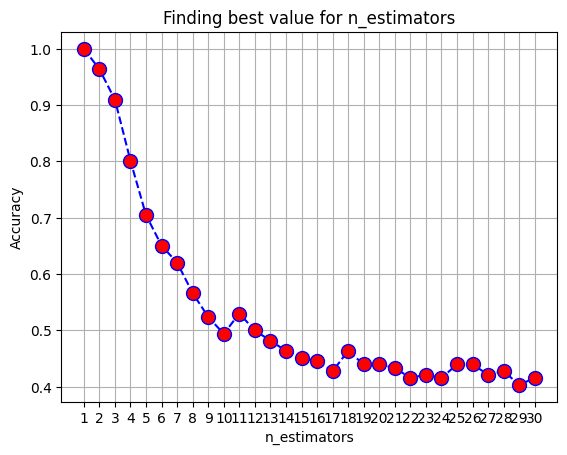

Highest value: 1.0


In [258]:
#knneighbors Algorithm
#plotting a graph for n neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_axis=list(range(1,31))
acc=pd.Series()
x=range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    prediction = knn_model.predict(X_test)
    acc = pd.concat([acc, pd.Series(metrics.accuracy_score(prediction, y_test))], ignore_index=True)

plt.plot(X_axis,acc, color='blue', linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value:',acc.values.max())

Text(0, 0.5, 'Error Rate')

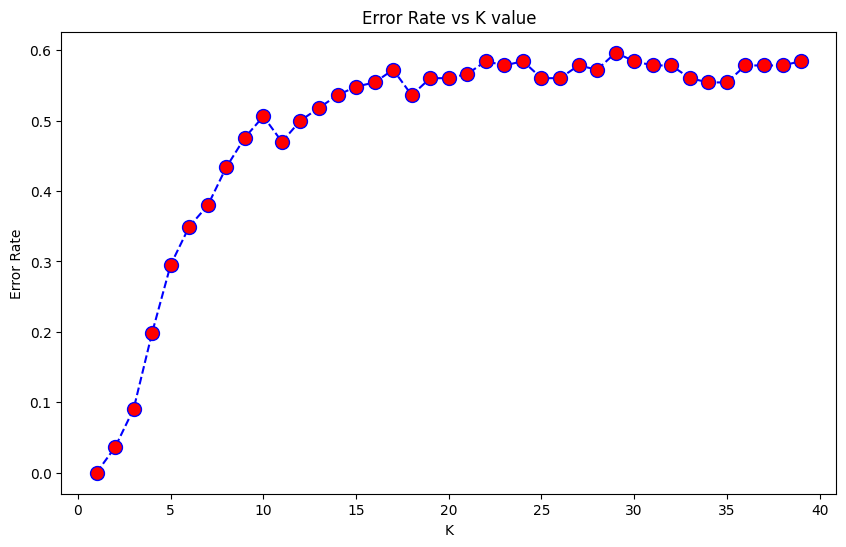

In [259]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color='blue', linestyle='dashed',marker='o', markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [260]:
#As from the above two graphs the best value for n is 1
#K nearest neighbors Algorithm
#metric='minkowski', parameter specifies the distance metric used to measure the distance between points. 
#'minkowski' is a generalization of the Euclidean and Manhattan distances. It's controlled by another parameter p.
#p=2:It controls the power parameter for the Minkowski metric. When p=2, it represents the Euclidean distance, and when p=1, it represents the Manhattan distance.
knn=KNeighborsClassifier(n_neighbors=1,metric='minkowski',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [261]:
#Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc=SVC(kernel='linear',random_state=42)
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [262]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [263]:
#Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier(criterion='entropy',random_state=42)
#criterion='entropy':Criterion used to measure the quality of a split.Entropy measures the impurity or disorder of a set of labels. 
#The algorithm aims to minimize entropy, leading to more homogeneous subsets at each node of the tree.
dectree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

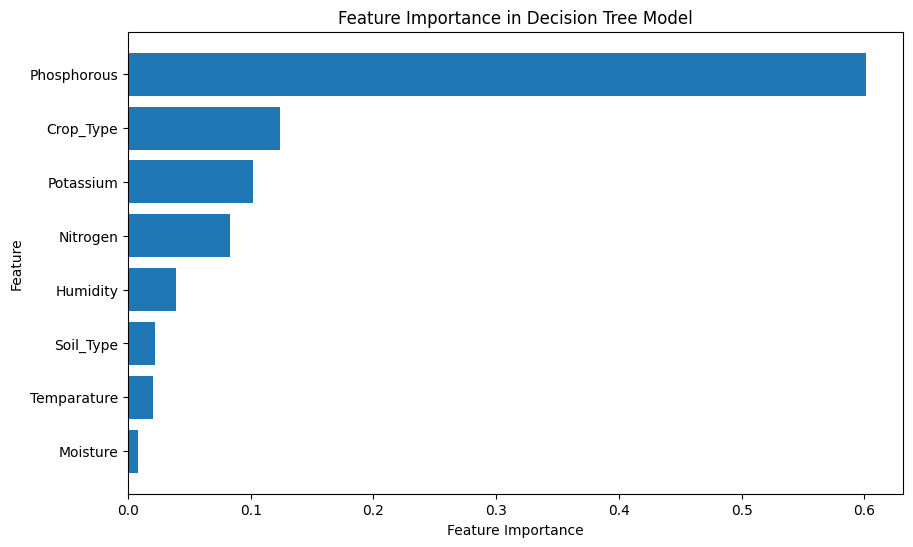

In [264]:
# Get feature importances
importances = dectree.feature_importances_
feature_names = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous','Soil_Type', 'Crop_Type']


# Create a DataFrame for the feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()
plt.show()


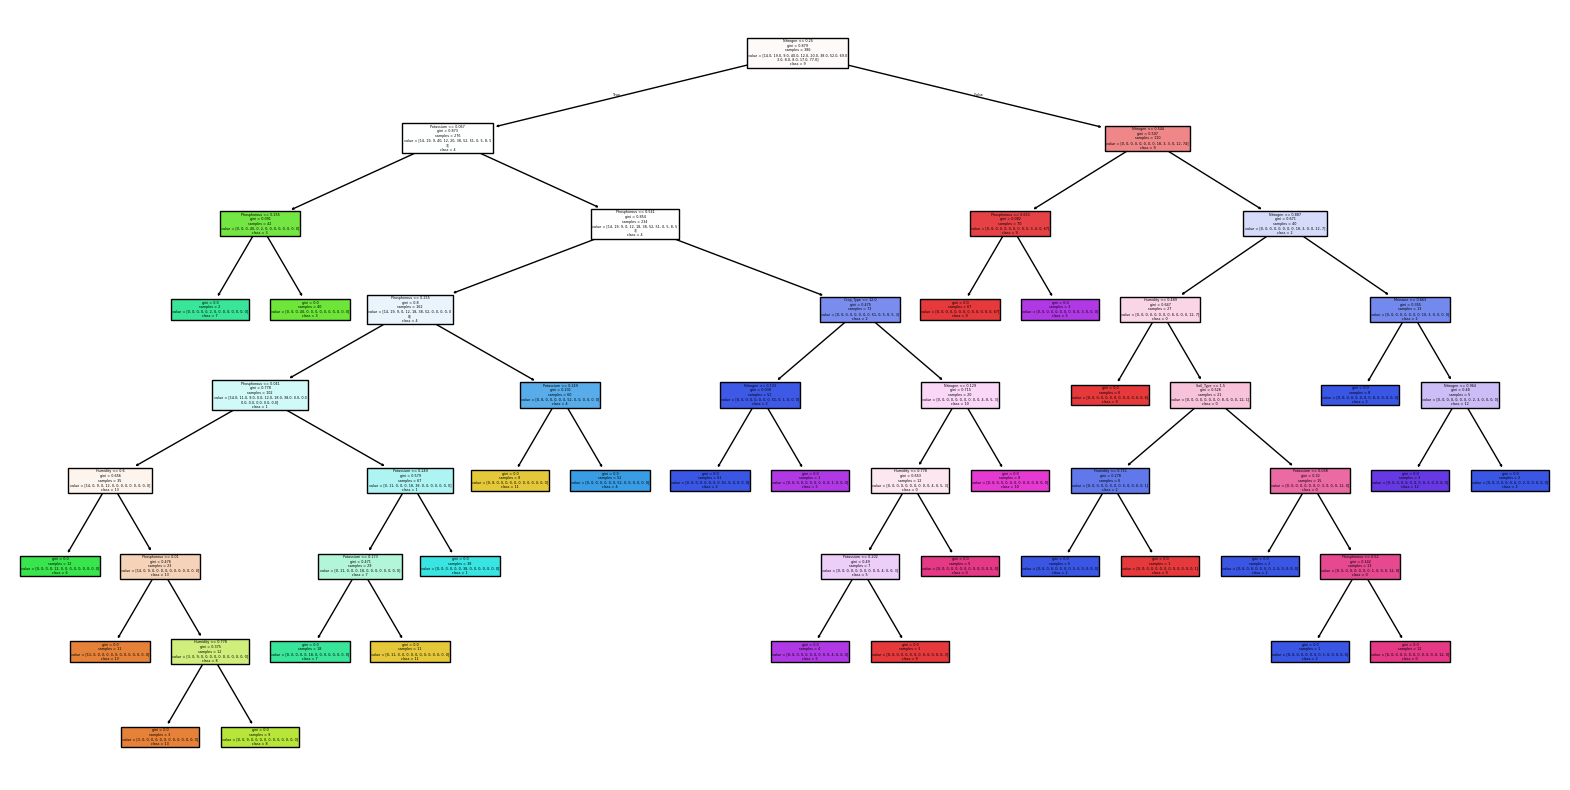

In [265]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you have a trained DecisionTreeClassifier model
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))  # Set the figure size for better visualization
plot_tree(
    dectree,
    filled=True,
    feature_names=X.columns,
    class_names=[str(cls) for cls in y_train.unique()]  # Convert classes to strings
)
plt.show()


C:\Users\Lkumar\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Lkumar\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Lkumar\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Lkumar\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Lkumar\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in 

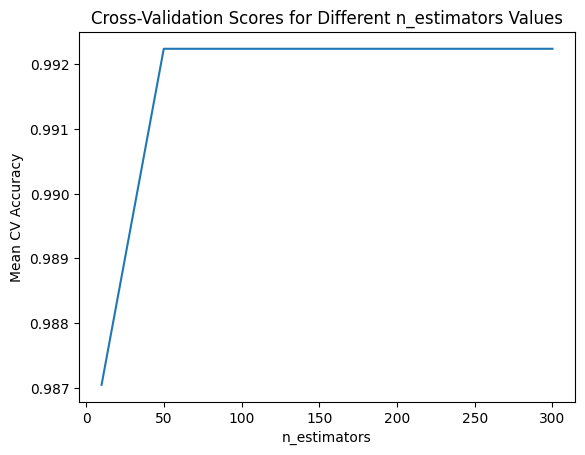

In [266]:
#Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
ranfo=RandomForestClassifier(n_estimators=11,criterion='entropy',random_state=42)

# List of values for n_estimators to try
n_estimators_values = [10, 50, 100, 200, 300]

# Dictionary to store mean cross-validation scores for each n_estimators value
cv_scores = {}

for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[n_estimators] = scores.mean()

# Plotting the mean cross-validation scores
plt.plot(list(cv_scores.keys()), list(cv_scores.values()))
plt.xlabel('n_estimators')
plt.ylabel('Mean CV Accuracy')
plt.title('Cross-Validation Scores for Different n_estimators Values')
plt.show()

In [267]:
#Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfo=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=42)
ranfo.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

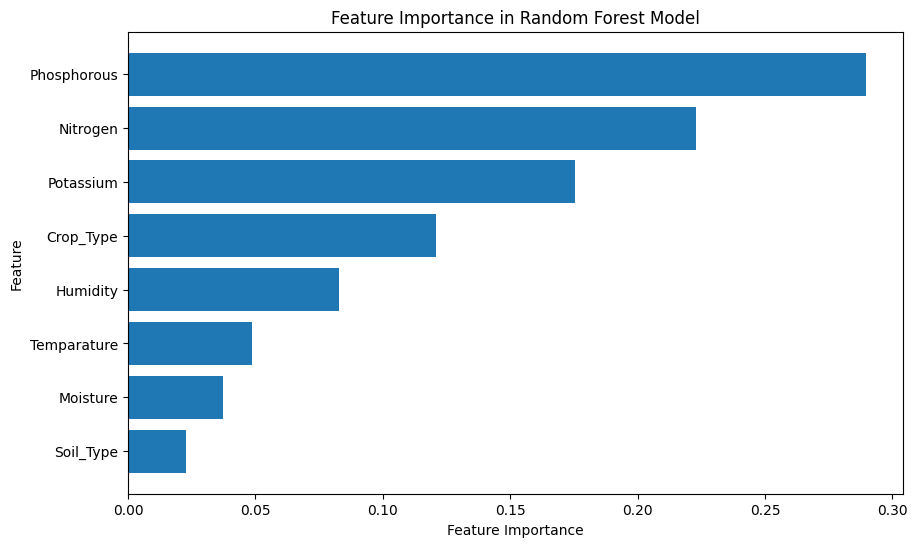

In [268]:
# Get feature importances
importances = ranfo.feature_importances_
feature_names = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous','Soil_Type', 'Crop_Type']

# Create a DataFrame for the feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

In [269]:
y_pred_logreg=logreg.predict(X_test)
y_pred_knn=knn.predict(X_test)
y_pred_svc=svc.predict(X_test)
y_pred_nb=nb.predict(X_test)
y_pred_dectree=nb.predict(X_test)
y_pred_ranfor=ranfo.predict(X_test)

In [270]:
#Model Evaluation
from sklearn.metrics import accuracy_score
accuracy_logreg=accuracy_score(y_test,y_pred_logreg)
accuracy_knn=accuracy_score(y_test,y_pred_knn)
accuracy_dectree=accuracy_score(y_test,y_pred_dectree)
accuracy_ranfor=accuracy_score(y_test,y_pred_ranfor)

In [271]:
#Model Comparison
models=pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random forest'],
    'Score': [100*round(accuracy_logreg,4),100*round(accuracy_knn,4),  100*round(accuracy_dectree,4), 100*round(accuracy_ranfor,4)]
})
models.sort_values(by='Score',ascending=False)

,Model,Score
1,KNN,100.00
3,Random forest,100.00
2,Decision Tree,90.96
0,Logistic Regression,59.04


In [272]:
#From the above comparison, we can observe that KNN and Random Forest gets the highest accuracy of 100%
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ranfo=confusion_matrix(y_test,y_pred_ranfor)
cm_knn=confusion_matrix(y_test,y_pred_knn)
print(cm_ranfo)
print('\n')
print(cm_knn)

[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 16  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 31]]


[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 16  0  0  0  0  0  0]
 [ 0  0

In [273]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_ranfor))
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        35
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00        31

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166

              precision  

In [274]:
X_test.head()
# y_test.head()


,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil_Type,Crop_Type
312,0.500000,0.622222,0.375,0.806452,0.576923,0.408163,2,1
18,0.692308,0.222222,0.375,0.314516,0.267222,0.410626,4,4
260,0.500000,0.644444,0.850,0.927419,0.692308,0.408163,2,1
83,0.730769,0.266667,0.475,0.153226,0.267222,0.469388,4,0
355,0.538462,0.044444,0.350,0.153226,0.267222,0.367347,1,7


In [275]:
feature_names = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous','Soil_Type', 'Crop_Type']
input_data = np.array([[0.500000,0.622222,0.375,0.806452,0.576923,0.408163,2,1]])
input_df = pd.DataFrame(input_data, columns=feature_names)
ranfo_out = ranfo.predict(input_df)
print(ranfo_out)

[8]


In [276]:
model=ranfo
import joblib
joblib.dump(model,'Fertilizer_Recommend.pkl')
print('Model Saved')

model = scaler
joblib.dump(model,'Fertilizer_scaler.pkl')
print('Scaler Saved')


Model Saved
Scaler Saved
